<a href="https://colab.research.google.com/github/telnarayanan/Pytorch-LearningProgress/blob/main/DL_BITS_CompVis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# DL dataset to BITS G drive
# Preserve same folder structure as BITs
  # Same folder structure for IP and OP
# EDA
# DL Algorithm as per Github - mrdbourke


# 0. Import Pytorch, Setup Device-Agnostic Code


In [2]:
import torch
from torch import nn
torch.__version__

'1.12.1+cu113'

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# 1. Get Data



1.   Get the files from Canvas Website
2.   Upload them to BITS - Google Drive.



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Verify Data
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [5]:
!ls

drive  sample_data


In [10]:
from os import walk
for (dirpath, dirnames, filenames) in walk("/content/drive/My Drive/Data/XRay/"):
    print("Directory path: ", dirpath)
    print("Folder name: ", dirnames)
    print("File name: ", filenames)

Directory path:  /content/drive/My Drive/Data/XRay/
Folder name:  []
File name:  ['Train_Test_Image.zip']


In [11]:
!unzip "/content/drive/My Drive/Data/XRay/Train_Test_Image.zip" -d "/content/drive/My Drive/Data/XRay/XRayExtract"

Archive:  /content/drive/My Drive/Data/XRay/Train_Test_Image.zip
   creating: /content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID/
  inflating: /content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID/COVID-19 (313).jpg  
  inflating: /content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID/COVID-19 (353).jpg  
  inflating: /content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID/COVID-19 (371).jpg  
  inflating: /content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID/COVID-19 (425).jpg  
  inflating: /content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID/COVID-19 (439).jpg  
  inflating: /content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID/COVID-19 (457).jpg  
  inflating: /content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID/COVID-19 (461).jpg  
  inflating: /content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID/COVID-19 (475).jpg  
  inflating: /content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID/COVID-19 (479).jpg  
  inflating: /content/drive/My Drive/Data/XRa

In [12]:
from os import walk
for (dirpath, dirnames, filenames) in walk("/content/drive/My Drive/Data/XRay/"):
    print("Directory path: ", dirpath)
    print("Folder name: ", dirnames)
    print("File name: ", filenames)

Directory path:  /content/drive/My Drive/Data/XRay/
Folder name:  ['XRayExtract']
File name:  ['Train_Test_Image.zip']
Directory path:  /content/drive/My Drive/Data/XRay/XRayExtract
Folder name:  ['Test', 'Train']
File name:  []
Directory path:  /content/drive/My Drive/Data/XRay/XRayExtract/Test
Folder name:  ['COVID', 'non_COVID']
File name:  []
Directory path:  /content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID
Folder name:  []
File name:  ['COVID-19 (313).jpg', 'COVID-19 (353).jpg', 'COVID-19 (371).jpg', 'COVID-19 (425).jpg', 'COVID-19 (439).jpg', 'COVID-19 (457).jpg', 'COVID-19 (461).jpg', 'COVID-19 (475).jpg', 'COVID-19 (479).jpg', 'COVID-19 (485).jpg', 'COVID-19 (516).jpg', 'COVID-19 (522).jpg', 'COVID-19 (540).jpg', 'COVID-19 (547).jpg', 'COVID-19 (551).jpg', 'COVID-19 (570).jpg', 'COVID-19 (583).jpg', 'COVID-19 (587).jpg', 'COVID-19 (609).jpg', 'COVID-19 (642).jpg', 'COVID-19 (691).jpg', 'COVID-19 (709).jpg', 'COVID-19 (713).jpg', 'COVID-19 (718).jpg', 'COVID-19 (727).jpg

# 2. Data Preparation - Exploratory Data analysis Become one with the data (data prep)

In [24]:
"""
Map out the Folder Structure

/content/drive/My Drive/Data/Xray/XrayExtract/  <- Overall Dataset folder
    Train/                                      <- Training dataset folder
        COVID/                                  <- Class name COVID as folder name
            COVID-19(1).jpg
            COVID-19(10).jpg
            ...       
        non-COVID/                              <- Class name non-COVID as folder name
            NORMAL(0).jpg
            NORMAL(1).jpg
            NORMAL(100).jpg
            ...
    Test/                                       <- Testing dataset folder
        COVID/                                  <- Class name COVID as folder name
            COVID-19(313).jpg                   
            COVID-19(353).jpg   
            ...
        non-COVID/                              <- Class name non-COVID as folder name
            NORMAL(10).jpg
            NORMAL(1001).jpg            
            ...
"""
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [28]:
from pathlib import Path

# Setup path to data folder
data_path = Path("/content/drive/My Drive/Data/XRay")
image_path = data_path / "XRayExtract"
walk_through_dir(image_path)

There are 2 directories and 0 images in '/content/drive/My Drive/Data/XRay/XRayExtract'.
There are 2 directories and 0 images in '/content/drive/My Drive/Data/XRay/XRayExtract/Test'.
There are 0 directories and 167 images in '/content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID'.
There are 0 directories and 317 images in '/content/drive/My Drive/Data/XRay/XRayExtract/Test/non_COVID'.
There are 2 directories and 0 images in '/content/drive/My Drive/Data/XRay/XRayExtract/Train'.
There are 0 directories and 543 images in '/content/drive/My Drive/Data/XRay/XRayExtract/Train/COVID'.
There are 0 directories and 1266 images in '/content/drive/My Drive/Data/XRay/XRayExtract/Train/non_COVID'.


In [117]:
# Setup train and testing paths
train_dir = image_path / "Train"
test_dir = image_path / "Test"

train_dir, test_dir

(PosixPath('/content/drive/My Drive/Data/XRay/XRayExtract/Train'),
 PosixPath('/content/drive/My Drive/Data/XRay/XRayExtract/Test'))

Random image path: /content/drive/My Drive/Data/XRay/XRayExtract/Train/non_COVID/NORMAL(100).jpg
Image class: non_COVID
Image height: 1615
Image width: 2172


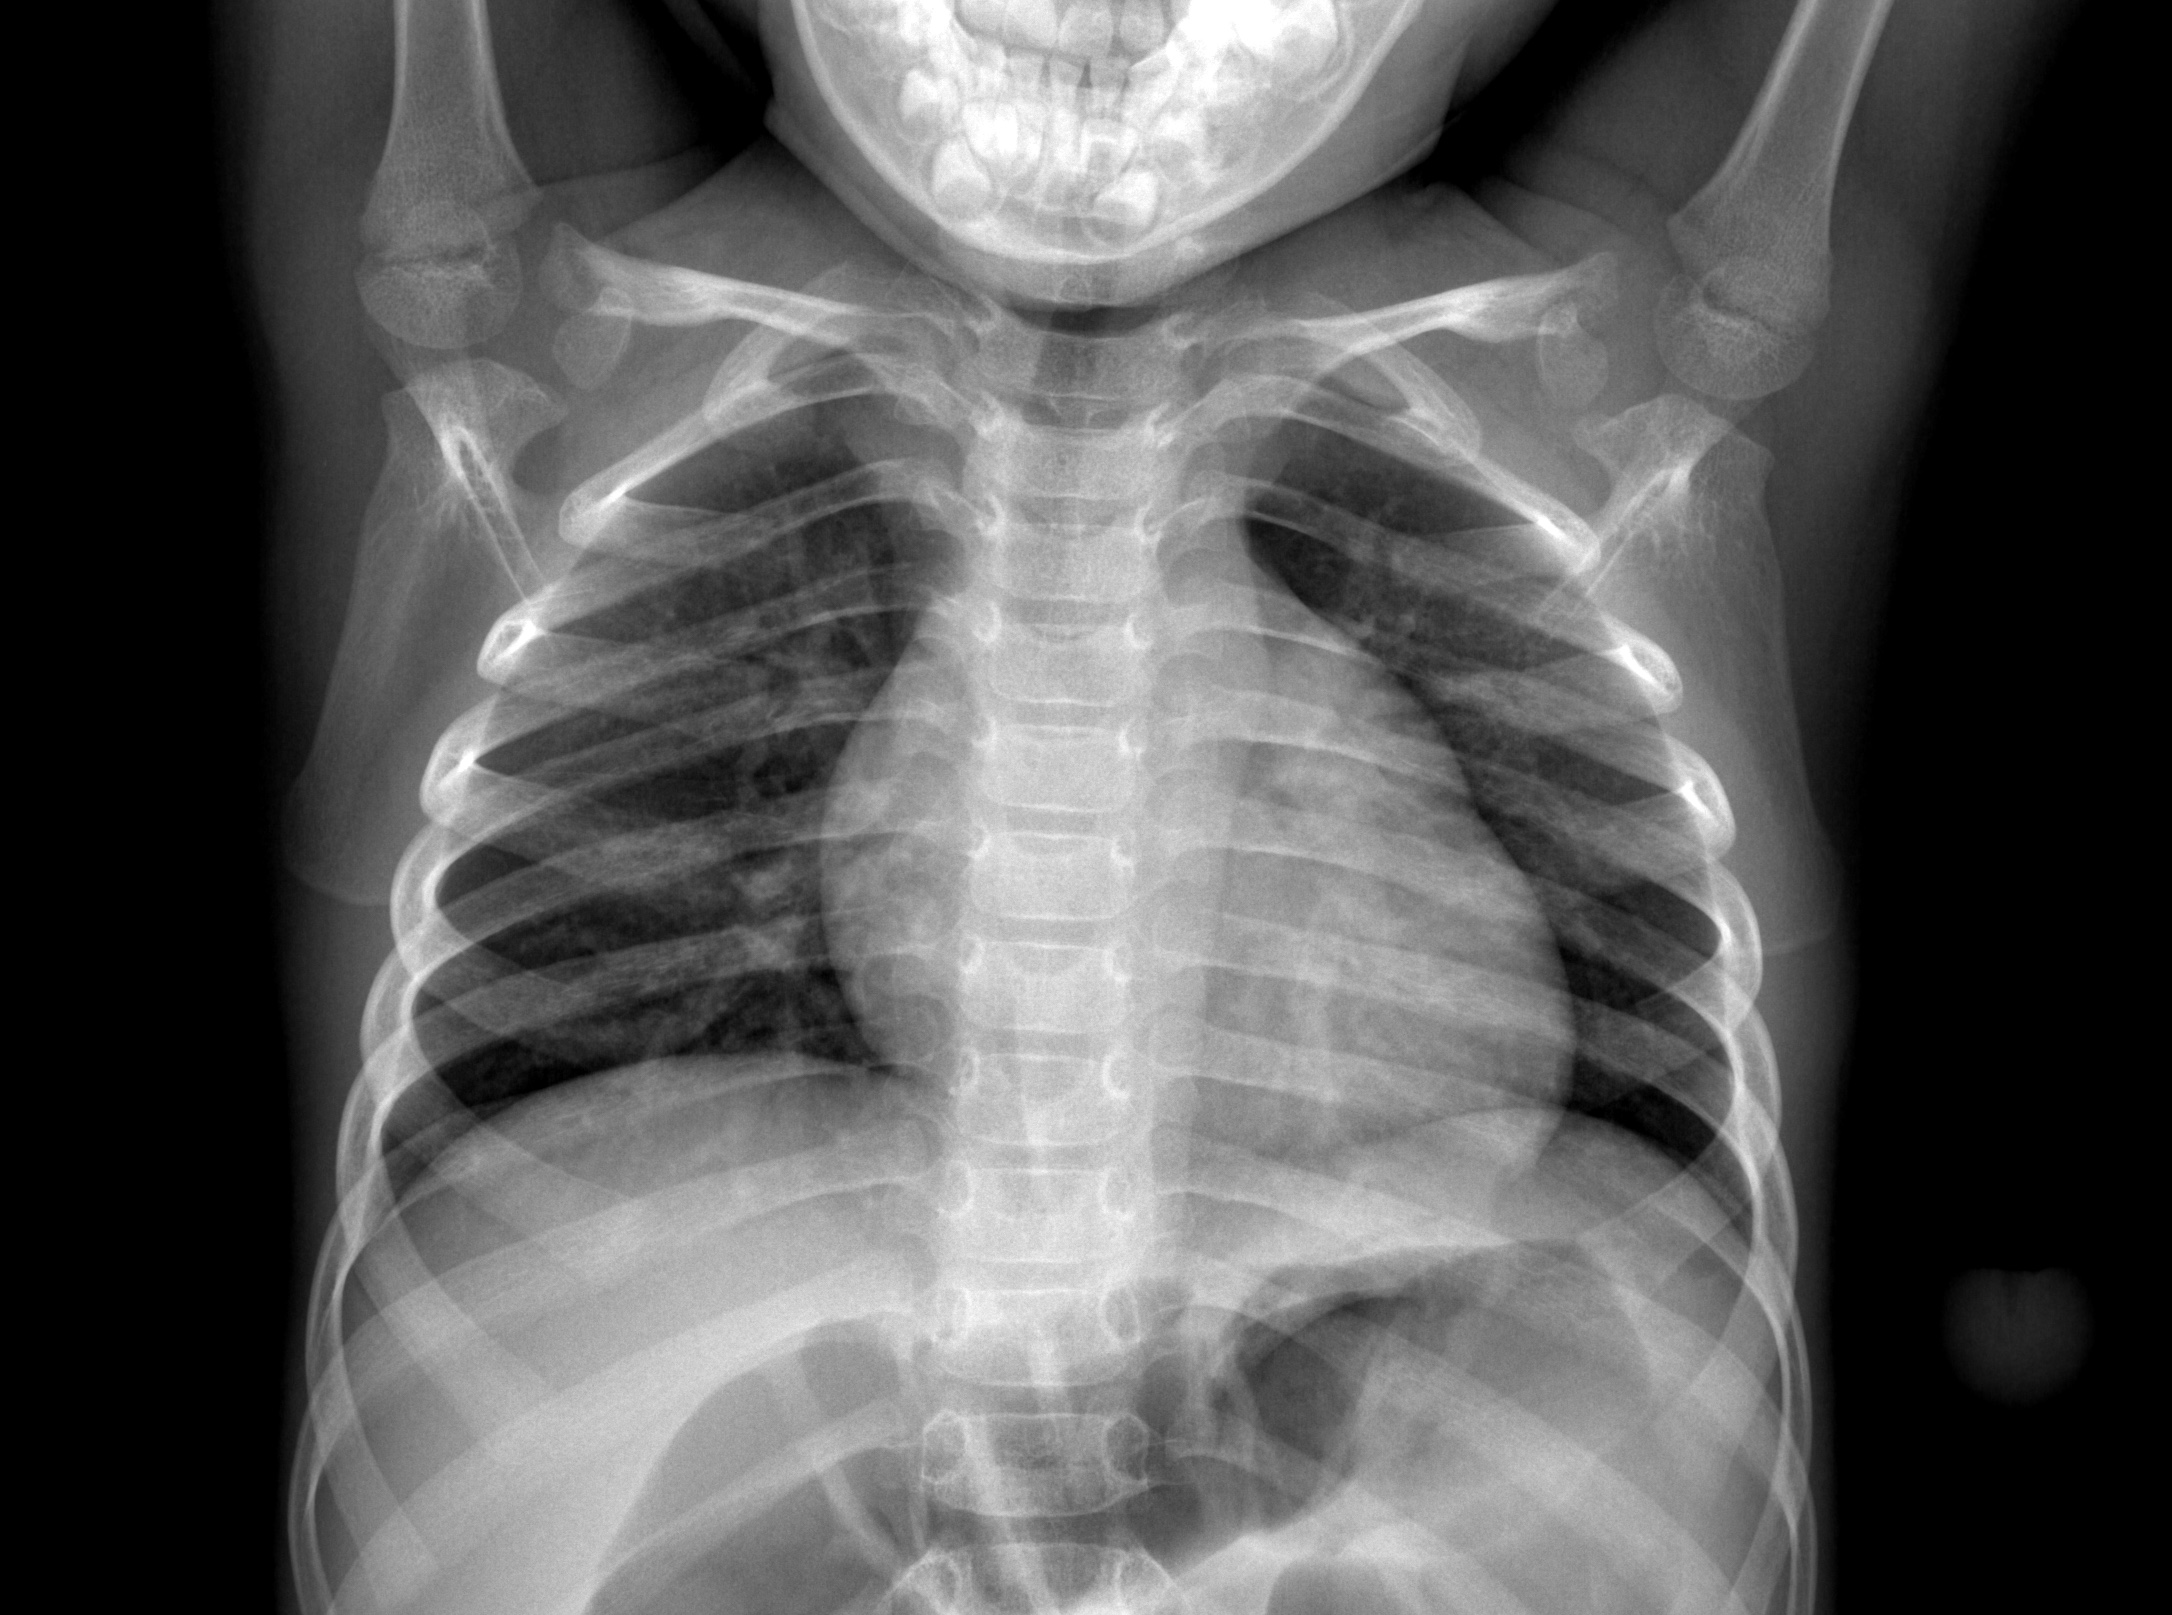

In [119]:
import random
from PIL import Image

# Set seed
# random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

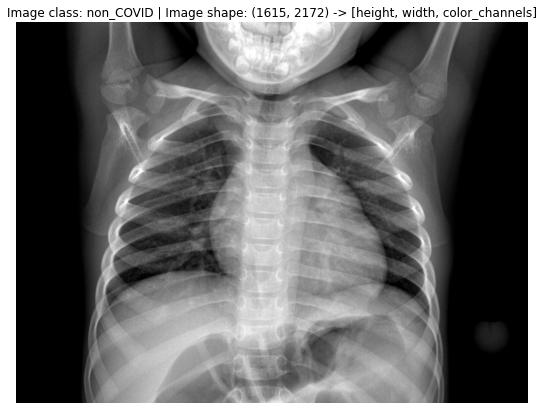

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array, cmap="gray")
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

# 3. Transforming Data

In [121]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [122]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor(), # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0,
    # transforms.Grayscale(1) # Adding grayscale 
])

In [123]:
image_paths = image_path_list
n = 3
random_image_paths = random.sample(image_paths, k=n)

/content/drive/My Drive/Data/XRay/XRayExtract/Test/COVID/COVID-19 (313).jpg
/content/drive/My Drive/Data/XRay/XRayExtract/Train/COVID/COVID19(131).jpg


TypeError: ignored

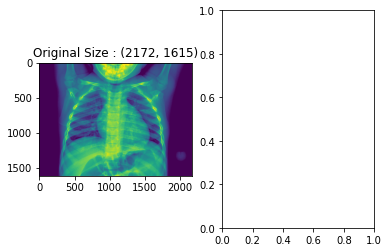

In [96]:
"""
print(image_path_list[0])
print(random_image_paths[2])
transform = data_transform
f = Image.open(random_image_paths[0])
#f
fig, ax = plt.subplots(1, 2)
ax[0].imshow(f)
ax[0].set_title(f"Original Size : {f.size}")
ax[0].axis="off"
transformed_image = transform(f).permute(1, 2, 0)
#ax[1].imshow(transformed_image) 
ax[1].set_title(f"Transformed Size :{transformed_image.shape}") 
ax[1].axis("off")
"""


In [127]:
transformed_image.shape

torch.Size([64, 64, 1])

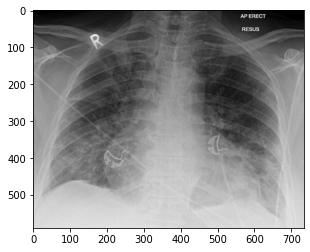

In [128]:
plt.imshow(Image.open(random_image_paths[0]))

torch.Size([64, 64])


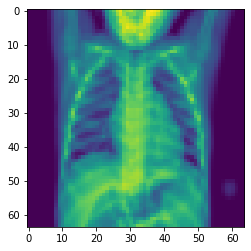

In [129]:
print(transformed_image.squeeze().shape)
plt.imshow(transformed_image.squeeze())

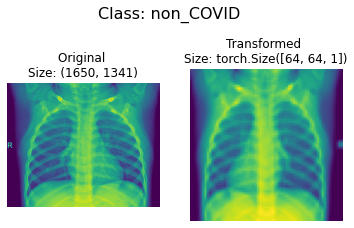

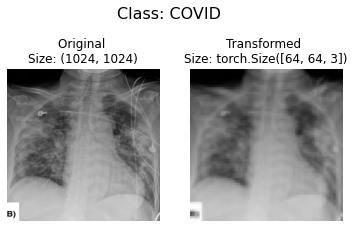

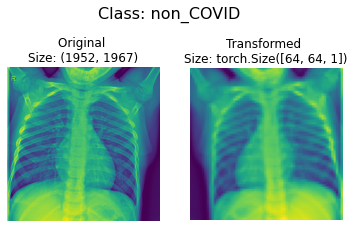

In [130]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image.squeeze()) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

# 4. Loading data with ImageFolder

In [131]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 1809
    Root location: /content/drive/My Drive/Data/XRay/XRayExtract/Train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 484
    Root location: /content/drive/My Drive/Data/XRay/XRayExtract/Test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [132]:
# Get class names as a list
class_names = train_data.classes
class_names

['COVID', 'non_COVID']

In [133]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'COVID': 0, 'non_COVID': 1}

In [134]:
# Check the lengths
len(train_data), len(test_data)

(1809, 484)

In [135]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0039],
         ...,
         [0.8863, 0.8667, 0.8627,  ..., 0.7804, 0.7176, 0.6353],
         [0.8784, 0.8745, 0.8745,  ..., 0.7843, 0.7373, 0.6431],
         [0.8667, 0.8784, 0.8824,  ..., 0.8039, 0.7569, 0.6627]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0039],
         ...,
         [0.8863, 0.8667, 0.8627,  ..., 0.7804, 0.7176, 0.6353],
         [0.8784, 0.8745, 0.8745,  ..., 0.7843, 0.7373, 0.6431],
         [0.8667, 0.8784, 0.8824,  ..., 0.8039, 0.7569, 0.6627]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.00

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


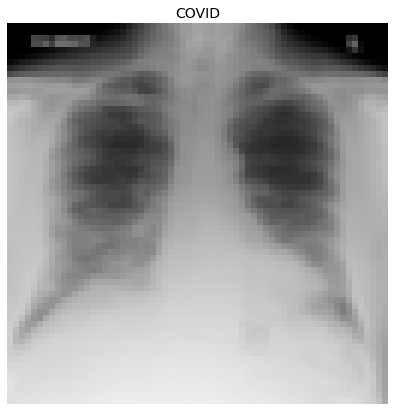

In [136]:

# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

In [137]:

# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=1, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=1, 
                             num_workers=1, 
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fb3ed6becd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb3ed6be9d0>)

# 5. Loading image data with a custom DataSet

# 6. Other forms of transforms

# 7. Model 9. TinyVGG - without data augmentation

#8. Exploring Loss Curves

# 9. Model 1: Tiny VGG - with data augmentation

#10. Compare Model Results

#11. Making a prediction on a custom image
